# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [44]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [34]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 8.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [7]:
# your answer here
temp_states = pd.read_csv('Temp_States.csv')
temp = pd.DataFrame(temp_states)


#### Print `temp`

In [8]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


 City and State are objects and Temperature is a float

#### Select the rows where state is New York

In [13]:
# your answer here
ny = temp.loc[temp['State']=='New York']

#### What is the average of the temperature of cities in New York?

In [16]:
# your answer here
round(ny['Temperature'].mean(),2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [17]:
# your answer here
hot = temp.loc[temp['Temperature']>15]
hot

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [21]:
# your answer here
hotcities = temp.loc[temp['Temperature']>15][['City', 'Temperature']]
hotcities

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


In [24]:
list(hotcities['City'])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [37]:
# your answer here
mildcities = temp.loc[(temp['Temperature']>15)&(temp['Temperature']<20)][['City', 'Temperature']]
mildcities

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [27]:
# your answer here
meanstd = ts.groupby('State').agg({'Temperature': ['mean', 'std']})
meanstd

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [30]:
# your answer here
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [29]:
# your answer here
employee.info()

#NAme, department, education, gender and title are objects (strings) but year and salary are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

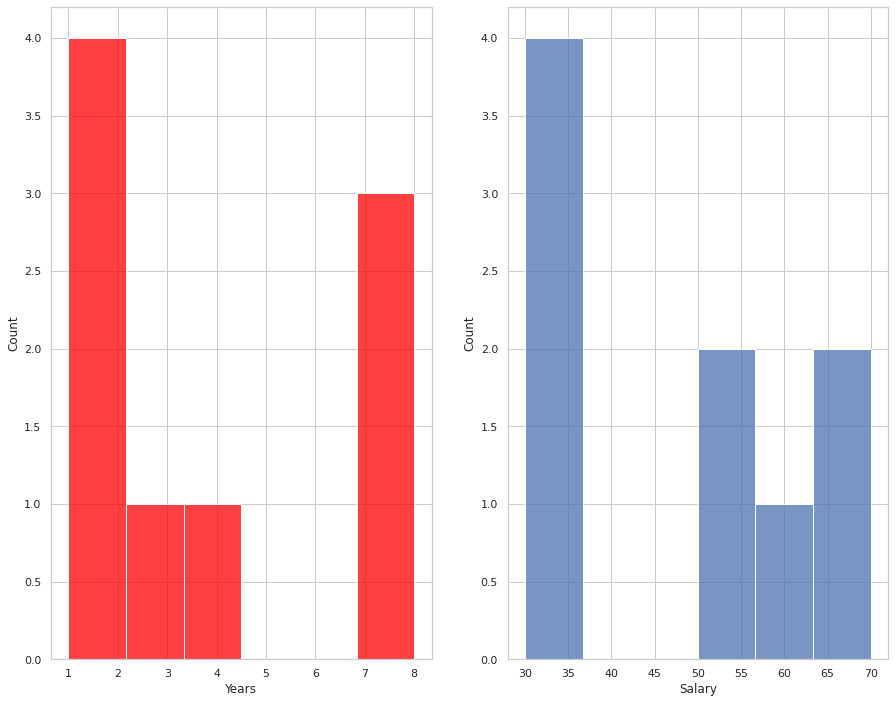

In [93]:
# your answer here
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,12))
sns.histplot(employee['Years'],color='red', ax=axs[0], bins =6);
sns.histplot(employee['Salary'], ax=axs[1], bins=6);

Se observa cierta relación entre años en la empresa y sueldo. 

#### What's the average salary in this company?

In [50]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [52]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [53]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [55]:
# your answer here
employee.loc[employee['Salary']==employee['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [58]:
# your answer here
david = employee.loc[employee['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [60]:
# your answer here
davsal = david['Salary']
davsal

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [61]:
# your answer here
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [62]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [63]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [65]:
# your answer here
assoabov50 = employee.loc[(employee['Title']=='associate')&(employee['Salary'] > 55)]
assoabov50

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [68]:
# your answer here
avgsalyears = employee.groupby('Years').mean()
avgsalyears

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [72]:
# your answer here
avgsaltitle = employee.groupby('Title').agg({'Salary': 'mean'})
avgsaltitle

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

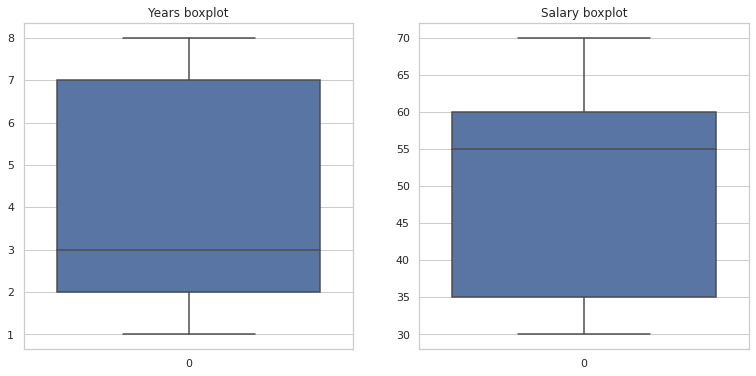

In [91]:
# draw boxplot here
fig, axs = plt.subplots(nrows=1   ,ncols=2  ,figsize=(13,6))
years = sns.boxplot(data=employee['Years'], ax=axs[0])
years.set(title='Years boxplot')
salary = sns.boxplot(data=employee['Salary'], ax = axs[1])
salary.set(title='Salary boxplot');

Q1 years= 2 --> 25% de los empleados llevan menos de dos años
Q3 years= 7 --> 75% de los empleados llevan menos de 7 años
Q1 salary = 35 -->75% de los empleados cobran más de 35
Q3 salary = 60 --> 25% de los empleados cobran más de 60

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [96]:
# your answer here
gender = employee.groupby('Gender').agg({'Salary':'mean'})
gender
print('Yes')

Yes


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [107]:
# your answer here
employee.describe().iloc[[1,3,-1],:]

,Years,Salary
mean,4.111111,48.888889
min,1.000000,30.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [109]:
# your answer here
employee.groupby('Department').agg({'Salary': np.ptp}) #np.ptp te da la diferencia entre máximo y mínimo

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [141]:
# your answer here
orders = pd.read_csv('Orders.csv')
orders.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
262940,366650,568783,22366,2011,9,4,9,doormat airmail,10,2011-09-29 09:03:00,7.08,17739,United Kingdom,70.80
83716,126977,547109,22367,2011,3,1,11,childrens apron spaceboy design,8,2011-03-21 11:46:00,1.95,12423,Belgium,15.60
116101,170522,551315,84945,2011,4,3,15,multi colour silver t-light holder,12,2011-04-27 15:08:00,0.85,17725,United Kingdom,10.20
77412,118533,546437,23230,2011,3,1,9,wrap alphabet design,25,2011-03-14 09:46:00,0.42,16807,United Kingdom,10.50
180698,258975,559679,22784,2011,7,1,14,lantern cream gazebo,3,2011-07-11 14:46:00,4.95,15265,United Kingdom,14.85


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [116]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [120]:
# your answer here
sumstats = orders.describe()
sumstats

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


En amount_spent la std es 309.05 y la media es 22.39. Debe haber outliers.

####  What is the average Purchase Price?

In [121]:
# your answer here
sumstats.loc['mean', 'amount_spent']

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [122]:
# your answer here
sumstats.loc['max', 'amount_spent']

168469.6

In [123]:
# your answer here
sumstats.loc['min', 'amount_spent']

0.0

#### Select all the customers we have in Spain

In [126]:
# your answer here
spain = orders.loc[orders.Country == 'Spain']['CustomerID']

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [127]:
# your answer here
len(spain)

2485

#### Select all the customers who have bought more than 50 items ?

In [130]:
# your answer here
more50 = orders[orders.Quantity > 50].CustomerID

#### Select orders from Spain that are above 50 items

In [133]:
# your answer here
more50spain= orders[(orders.Quantity > 50) & (orders.Country == 'Spain')]


#### Select all free orders

In [136]:
# your answer here
free = orders[orders.amount_spent ==0]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [171]:
# your answer here
lunchbag = orders[orders.Description.str.match(r'.*lunch\sbag.*')==True]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [170]:
# your answer here
lunch2011 = orders[(orders.year == 2011) & (orders.Description.str.match(r'.*lunch\sbag.*')==True)]

#### Show the frequency distribution of the amount spent in Spain.

In [149]:
def quitaroutliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1
    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
    
    return [s for s in series if (s>min) and (s<max)]

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

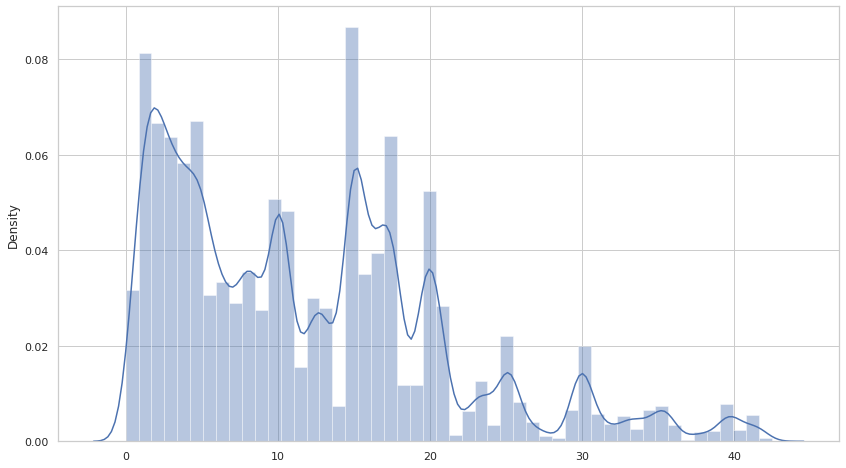

In [152]:
# your answer here
nocero = orders[orders.amount_spent != 0]
sns.distplot(quitaroutliers(orders['amount_spent']))

#### Select all orders made in the month of August

In [160]:
# your answer here
august = orders[orders.month == 8]


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [165]:
# your answer here
august.month.value_counts()

8    27013
Name: month, dtype: int64

#### What's the  average amount of money spent by country

In [166]:
# your answer here
orders.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [167]:
# your answer here
orders.UnitPrice.max()

8142.75

#### What was the average amount spent per year ?

In [168]:
# your answer here
orders.groupby('year').agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
